In [32]:
import pandas as pd
from collections import Counter 
from math import log2

In [8]:
mush = pd.read_csv('agaricus-lepiota.data', header=None)
#mush.columns = ["C"] + list("abcdefghijklmnopqrstuv")
mush

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [9]:
outcome = mush[0]
counts = Counter(outcome)
for k,v in counts.items():
    print(k, v, round(v / len(outcome), 3))

p 3916 0.482
e 4208 0.518


In [10]:
# What unique values occur in column 1?
vals = set(mush[1])
vals

{'b', 'c', 'f', 'k', 's', 'x'}

In [11]:
# Split table into "b" and "not b"
df1, df2 = mush[mush[1]=='b'], mush[mush[1] != 'b']

In [12]:
df1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
12,e,b,s,y,t,a,f,c,b,w,...,s,w,w,p,w,o,p,n,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,e,b,s,n,f,n,a,c,b,o,...,s,o,o,p,n,o,p,y,c,l
8078,e,b,f,g,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,s,g
8084,e,b,f,g,f,n,f,w,b,p,...,k,w,w,p,w,t,p,w,s,g
8094,e,b,s,g,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,n,g


In [13]:
df2

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [14]:
# get the class counts for each split
cnt1, cnt2 = Counter(df1[0]), Counter(df2[0])
print(cnt1, cnt2)

Counter({'e': 404, 'p': 48}) Counter({'p': 3868, 'e': 3804})


In [15]:
def total(cnt):
    return sum(cnt.values())

In [43]:
#def accuracy(cnt):
#    return cnt.most_common(1)[0][1] / total(cnt)
    
def gini(cnt):
    tot = total(cnt)
    return 1 - sum([(v/tot)**2 for v in cnt.values()])

def entropy(cnt):
    tot = total(cnt)
    return sum([(-v/tot) * log2(v/tot) for v in cnt.values()])
    
def wavg(cnt1, cnt2, measure):
    tot1 = total(cnt1)
    tot2 = total(cnt2)
    tot = tot1 + tot2
    return (measure(cnt1) * tot1 + measure(cnt2) * tot2) / tot

In [45]:
print(cnt1)
print(accuracy(cnt1), gini(cnt1), entropy(cnt1))
print()
print(cnt2)
print(accuracy(cnt2), gini(cnt2), entropy(cnt2))

print("Average: ", wavg(cnt1, cnt2, accuracy))
print("Gini.  : ", wavg(cnt1, cnt2, gini))
print("Entropy: ", wavg(cnt1, cnt2, entropy))

Counter({'e': 404, 'p': 48})
0.8938053097345132 0.18983475604980815 0.48833020341885913

Counter({'p': 3868, 'e': 3804})
0.5041710114702815 0.4999652053266296 0.9999498013150541
Average:  0.5258493353028065
Gini.  :  0.4827102861891206
Entropy:  0.9714845061096036


In [46]:
def evaluate_split(df, class_col, split_col, feature_val, measure):
    df1, df2 = df[df[split_col] == feature_val], df[df[split_col] != feature_val]
    cnt1, cnt2 = Counter(df1[class_col]), Counter(df2[class_col])
    return wavg(cnt1, cnt2, measure)

In [54]:
evaluate_split(mush, 0, 1, 'x', entropy)

0.9985463422665674

In [56]:
vals = set(mush[1])
vals

{'b', 'c', 'f', 'k', 's', 'x'}

In [60]:
for v in vals:
    print(v, evaluate_split(mush, 0, 1, v, entropy))

c 0.9985493388618741
b 0.9714845061096036
x 0.9985463422665674
k 0.9792424648711194
s 0.9953191625014424
f 0.9988203582327274


In [82]:
def best_split_for_column(df, class_col, split_col, method):
    best_v = ''
    best_meas = float("inf")
    
    for v in set(mush[split_col]):
        
        meas = evaluate_split(df, class_col, split_col, v, method)
        if  meas < best_meas:
            best_v = v
            best_meas = meas
    
    return best_v, best_meas
        

In [85]:
best_split_for_column(mush, 0, 1, entropy)

('b', 0.9714845061096036)

In [90]:
def best_split(df, class_col, method):
    best_col = 0
    best_v = ''
    best_meas = float("inf")
    
    for split_col in df.columns:
        if split_col != class_col:
            v, meas = best_split_for_column(df, class_col, split_col, method)
            if meas < best_meas:
                best_v = v
                best_meas = meas
                best_col = split_col
                
    return best_col, best_v, best_meas
        

In [92]:
best_split(mush, 0, gini)

(5, 'n', 0.19120306358527953)

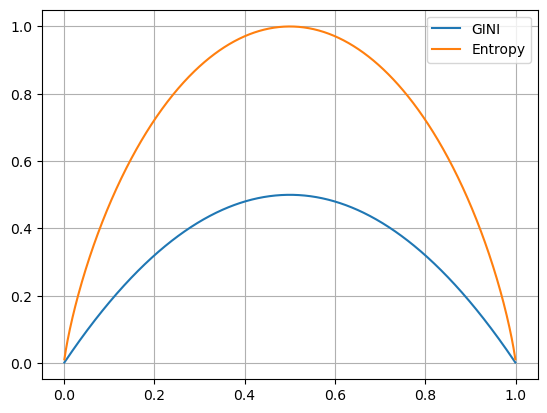

In [106]:

import numpy as np
import matplotlib.pyplot as plt

P = np.arange(0.001, 1, 0.001)
G = 1 - P**2 - (1-P)**2
H = -P*np.log2(P) -(1-P)*np.log2(1-P)

plt.plot(P, G, label='GINI')
plt.plot(P, H, label='Entropy')
plt.legend()
plt.grid()